# Intro to Computer Vision
In this notebook you will use the [quickdraw](https://quickdraw.withgoogle.com/data) dataset to build a simple image recongnition neural net.

We will be using matplotlib for this assignment so start with installing it via pip.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

# Step 1: Data

Quickdraw supports A LOT of images. Rather than training on all 50 million, we will start with just a few. 
Your model should train on at least 5 categories of drawings. 
This will be more fun if they look similar to each other. 

Go to [quickdraw](https://quickdraw.withgoogle.com/data) and select at least 5 categories to use for your model. These are stored in a Google Cloud storage bucket called quickdraw_dataset.

Load each of your categories by these steps:

1. ` pip install gsutil`

2.  `gsutil -m cp 'gs://quickdraw_dataset/full/numpy_bitmap/<your category>.npy' .`


Do step 2 once per category. 

*You will need to do this both locally and in your gcloud vm. (they are too big to push to github)

## Load Your Data

Your data will be in a .npy format (numpy array). We will load it differently this time: for example

`data_airplanes = np.load("airplane.npy")`

In [ ]:
# Helper function to show images from your dataset
def show_image(data):
    index = random.randint(0, len(data)-1)
    img2d = data[index].reshape(28, 28)
    plt.figure()
    plt.imshow(img2d)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [ ]:
# Load your first cateogry of images
data_apple = np.load("apple.npy")

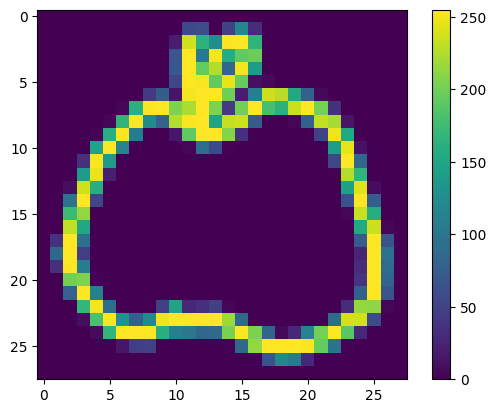

In [ ]:
# Now use the function above to show an image from your data
show_image(data_apple)

In [ ]:
# Now load your second category of images
data_blackberry = np.load("blackberry.npy")

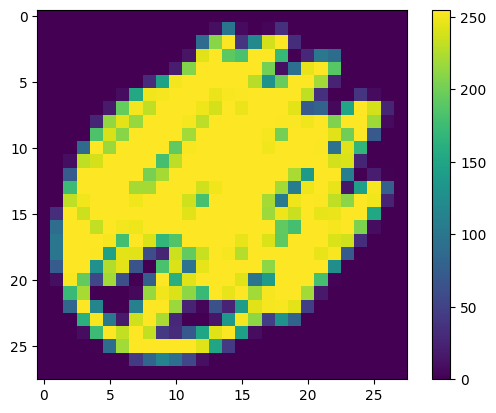

In [ ]:
# visualize your second category of images
show_image(data_blackberry)

In [ ]:
# Now load your third category of images
data_clock = np.load("clock.npy")

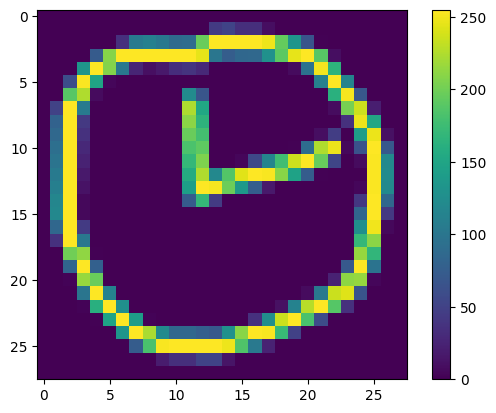

In [ ]:
# visualize your third category of images
show_image(data_clock)

In [ ]:
# Now load your 4th category of images
data_cookie = np.load("cookie.npy")

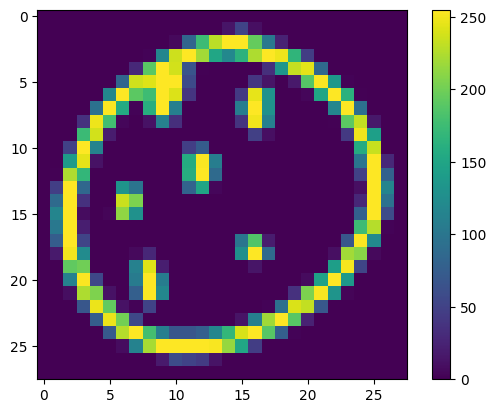

In [ ]:
# visualize your 4th category of images
show_image(data_cookie)

In [ ]:
# Now load your 5th category of images
data_toilet = np.load("toilet.npy")

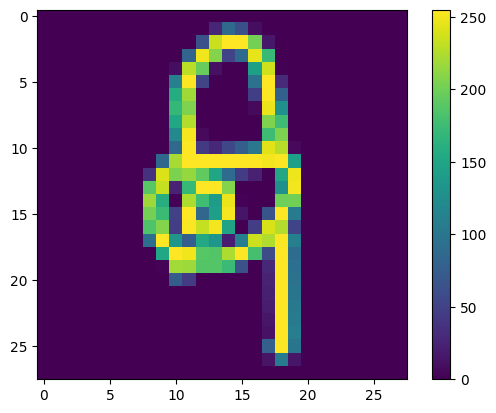

In [ ]:
# visualize your 5th category of images
show_image(data_toilet)

## Preprocess your data

Now it's time to define X and y. We want our X and y data to include ALL of the categories you loaded above.

You can combine np.arrays together using something like `np.vstack`.


In [ ]:
# define X by combining all loaded data from above
X = np.vstack([data_toilet, data_cookie, data_clock, data_blackberry, data_apple])

In [ ]:
# verify the X was defined correctly
assert X.shape[1] == 784
assert X.shape[0] >= 550000

Now it's time to define y. Recall that y is an array of "correct labels" for our data. For example, ['airplane', 'airplane', 'cat', 'bird', ....]


In the above step you created an array of images stored in X of 5 different categories. Now, create an array of labels to match those images. 

In [ ]:
# define y by creating an array of labels that match X
y = np.concatenate([
    np.full(len(data_toilet),0),
    np.full(len(data_cookie),1),
    np.full(len(data_clock),2),
    np.full(len(data_blackberry), 3),
    np.full(len(data_apple),4)
])



In [ ]:
# verify that y is the same length as X
assert len(y) == len(X)

## Split your data

Split your data is 80 training/ 20 testing as usual. 

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define your model

Now define your neural network using tensorflow. 

In [ ]:
# Define your model with the correct input shape and appropriate layers
model = tf.keras.models.Sequential([
   
 tf.keras.layers.Dense(1024, input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')   



])

In [102]:
# Compile your model
lr = 0.001



model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr), 
    metrics =['accuracy']
)

## Train your model locally

Train your model. 

In [101]:
# Fit your model 
history = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs=100)




KeyboardInterrupt: 

# Train your model on gcloud

Your model likely is a bit slow... move it to the Gcloud gpu. Since we can't run notebooks in gcloud, you can convert it to a python file first by running:

`jupytext --to py quickdrawClassifier.ipynb`

Then push the generated quickdrawClassifier.py file to github and then pull it down to your gcloud laptop to run.